### PCA Analysis

The goal of PCA analysis is to transform correlated features to a smaller set of features called principal components. It is very useful for analyzing large datasets because, it reduces their dimension.

In that way, we can find specific patterns in our datas or possible outliers.
As a result of this analysis we could improve the performances of our models.

An important part of PCA, is that the principal components we choose must explain much of the variation of our data. 
So it is essential that our principal components explain approximately 70 − 80% of the variation of our data.
PCA Steps :

            i) First we have to standarize our data.

            ii) Calculate the covariance matrix for all features.

            iii) Compute eigenvalues and eigenvectors of the covariance matrix.

            iv) Choose number of principal components based on how much variation of our data they cover.
    

Covariance matrix: if the value of the covariance matrix is positive then : the two variables increase or decrease together (correlated). 
if negative then : One increases when the other decreases (Inversely correlated).

Principal components are new uncorrelated variables that carry most of the information of the initial variables and are created as a linear combination of them.So the information is compressed into the components that contain higher variance of the original data.

The eigenvectors of the Covariance matrix are actually the directions of the axes where there is the most variance(most information) and that we call Principal Components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the amount of variance carried in each Principal Component.

In order to compute the percentage of variance (information) accounted for by each component, we divide the eigenvalue of each component by the sum of the eigenvalues. For example if  PC1 and PC2 carry respectively 94% and 6% of the variance of the data, removing the eigenvector v2  we will reduce dimensionality by 1 but we will consequently cause a loss of information in the final data set. On the other hand, given that v2 was carrying only 6% of the variance, the loss will not be very important and we will still have 94% of the information that is carried by v1.
 
So, we conclude that it is up to us to choose which and how many components that are important for explaining  efficiently our data.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel("defra.xlsx")
data=pd.get_dummies(data)

from sklearn.preprocessing import MinMaxScaler
#scaling our data
sc = MinMaxScaler()
data_scaled = sc.fit_transform(data)
data

,England,Wales,Scotland,N. Ireland,Product_Alcoholic drinks,Product_Beverages,Product_Carcass meat,Product_Cereals,Product_Cheese,Product_Confectionery,...,Product_Fish,Product_Fresh Veg,Product_Fresh fruit,Product_Fresh potatoes,Product_Other Veg,Product_Other meat,Product_Processed Veg,Product_Processed potatoes,Product_Soft drinks,Product_Sugars
0,105,103,103,66,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,245,227,242,267,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,685,803,750,586,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,147,160,122,93,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,193,235,184,209,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,156,175,147,139,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,720,874,566,1033,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,253,265,171,143,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8,488,570,418,355,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
9,198,203,220,187,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# calculation of the covariance matrix
cov_data = np.cov(data_scaled)
cov_data.shape

(17, 17)

In [4]:
#eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_data)
eigenvectors.shape

(17, 17)

In [5]:
#Assign P to the matrix of eigenvectors and D to the diagonal matrix 
#with eigenvalues on the diagonal and values of zero everywhere else.
#The eigenvalues on the diagonal of D will be associated with the corresponding column in P.
D = np.diag(eigenvalues)
P = eigenvectors

In [6]:
P.shape

(17, 17)

In [7]:
Z_new = np.dot(cov_data, P)

In [8]:
Z_new.shape

(17, 17)

In [9]:
sum_eigenvalues = np.sum(eigenvalues)

prop_var = [i/sum_eigenvalues for i in eigenvalues]

In [10]:
prop_var

[0.35003955257393443,
 0.013725377700172861,
 0.047329315243163354,
 0.04417404344907204,
 0.0421429836027182,
 0.04188239395257825,
 0.041882393952578235,
 0.04188239395257832,
 0.04188239395257828,
 0.041882393952578284,
 0.041882393952578256,
 0.04188239395257825,
 0.04188239395257827,
 0.041882393952578256,
 0.04188239395257824,
 0.04188239395257828,
 0.041882393952578284]

In [11]:
cum_var = [np.sum(prop_var[:i+1]) for i in range(len(prop_var))]
cum_var

[0.35003955257393443,
 0.3637649302741073,
 0.41109424551727064,
 0.4552682889663427,
 0.49741127256906087,
 0.5392936665216391,
 0.5811760604742173,
 0.6230584544267956,
 0.664940848379374,
 0.7068232423319523,
 0.7487056362845306,
 0.7905880302371088,
 0.8324704241896871,
 0.8743528181422653,
 0.9162352120948435,
 0.9581176060474218,
 1.0]

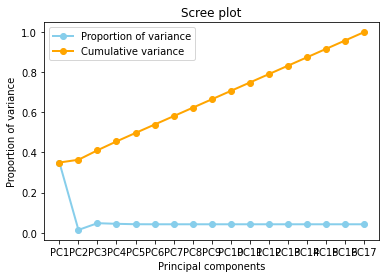

In [12]:
import matplotlib.pyplot as plt

x_labels = ['PC{}'.format(i+1) for i in range(len(prop_var))]

plt.plot(x_labels, prop_var, marker='o', markersize=6, color='skyblue', linewidth=2, label='Proportion of variance')
plt.plot(x_labels, cum_var, marker='o', color='orange', linewidth=2, label="Cumulative variance")
plt.legend()
plt.title('Scree plot')
plt.xlabel('Principal components')
plt.ylabel('Proportion of variance')
plt.show()

### The first component carries the 35% of the variation of our data, the other 15 components carry approximately 4% of the dataset and the second carry 1.37% . So we can use the first principal component for our analysis.